# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

DifferentialAbundance from nf-core

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [10]:
#Sham_oxy_1	Sham_oxy_2	Sham_oxy_3	Sham_oxy_4	Sham_Sal_1	Sham_Sal_2	Sham_Sal_3	Sham_Sal_4	SNI_oxy_1	SNI_oxy_2	SNI_oxy_3	SNI_oxy_4	SNI_Sal_1	SNI_Sal_2	SNI_Sal_3	SNI_Sal_4

import pandas as pd
df = pd.read_csv("data/salmon.merged.gene_counts.tsv", sep="\t", index_col=0)

header = df.columns.drop('gene_name')

conditions = []
samples = []
for i in range(len(header)):
    condition = header[i][:-2]
    conditions.append(condition)
    samples.append(header[i])

samplesheet = pd.DataFrame({"sample": samples, "condition": conditions})

samplesheet.to_csv("data/samplesheet.csv", sep=",", index=False)






Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [ ]:
nextflow run nf-core/differentialabundance \
    --input data/samplesheet.csv \
    --contrasts data/contrasts.csv \ 
    --matrix data/salmon.merged.gene_counts.tsv \
    --outdir diff_abun_out \
    --genome GRCm38 \
    --max_memory '6.GB' \
    -profile rnaseq,docker \
    -r 1.5.0 \
    -resume

Completed at: 01-Oct-2025 10:36:22

Duration    : 10m 27s

CPU hours   : 0.2

Succeeded   : 13

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

--input data/samplesheet.csv: as a sample sheet is needed so the program can reference the contrast and matrix

--contrasts data/contrasts.csv: specifies which comparisons you want to make for differential testing

--matrix data/salmon.merged.gene_counts.tsv: output

--outdir diff_abun_out: output folder

--genome GRCm38: as we do not have a gtf file we need a reference genome

--max_memory '6.GB': because my laptop sucks

-profile rnaseq,docker: container so the pipeline runs on my laptop

-r 1.5.0: as the pipeline is in resume to specify the version

-resume

What were the outputs of the pipeline?

pipeline info, plots, a report and tables

Would you exclude any samples? If yes, which and why?

Yes, according to the multiQC report, Nac_Sal_3 and Nac_Sal_7 failed which means that they have a low quality and finidings might not be interpretable

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

control_treated_test: 7 (SNI_sal vs Sham_sal)

control_treated: 18 (SIN_oxy vs Sham_oxy)

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc (Nucleus Accumbens) is part of the ventral striatum, deep in the basal forebrain and is a central hub in the brain’s reward and motivation circuits. It integrates dopamine, glutamate, and GABA signals which is key for reinforcement learning and addiction.

mPFC (medial Prefrontal Cortex) is located in the frontal lobe, along the midline. It is critical for executive functions: decision-making, cognitive control, working memory, and regulation of emotional responses. There is a strong top-down regulation of limbic and reward systems.

VTA (Ventral Tegmental Area) is a midbrain structure containing dopaminergic neurons and a major source of dopamine projections to NAc and PFC. It governs reward prediction, motivation, and reinforcement.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

I have not found any specific genes associated with these regions

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

In the paper they give additional pathway analysis and region specific information as well as cell type deconvolution. This enriches the raw data for it to be more interpretable.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

In [22]:
shamoxy = pd.read_csv("diff_abun_out_sham/tables/differential/condition_Shamsal_Shamoxy.deseq2.results_filtered.tsv", sep="\t", index_col=0)
snioxy = pd.read_csv("diff_abun_out_sham/tables/differential/condition_Shamsal_SNIoxy.deseq2.results_filtered.tsv", sep="\t", index_col=0)
snisal = pd.read_csv("diff_abun_out_sham/tables/differential/condition_Shamsal_SNIsal.deseq2.results_filtered.tsv", sep="\t", index_col=0)

shamoxy_genes = set(shamoxy.index.tolist())
snioxy_genes = set(snioxy.index.tolist())
snisal_genes = set(snisal.index.tolist())


/home/lorena/miniconda3/envs/workflows/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


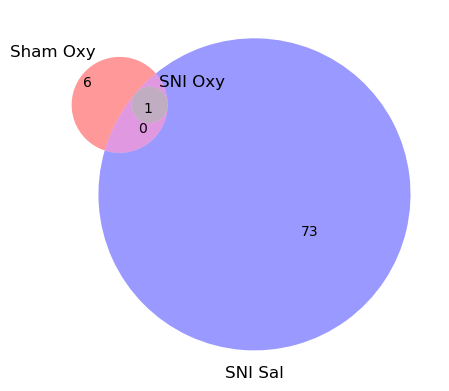

In [23]:
import matplotlib_venn as venn
import matplotlib.pyplot as plt

venn.venn3([shamoxy_genes, snioxy_genes, snisal_genes], ('Sham Oxy', 'SNI Oxy', 'SNI Sal'))
plt.show()
